<h3>Τεχνικές Εξόρυξης Δεδομένων
Εαρινό Εξάμηνο 2019-2020
2η Άσκηση
</h3>

In [1]:
import glob
import pandas as pd
import numpy as np
import os
import io
import csv
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

from sklearn import preprocessing
from sklearn import metrics


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:

# train = 'train_set.tsv'
# counter = 0
# with open(train, 'wt') as out_file:
#     tsv_writer = csv.writer(out_file, delimiter='\t')
#     tsv_writer.writerow(['Id', 'Title','Content','Category'])
#     work_dir = "fulltext/data/business"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r", encoding="utf-8") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"business"])
#             counter += 1
#     work_dir = "fulltext/data/entertainment"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r", encoding="utf-8") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"entertainment"])
#             counter += 1
#     work_dir = "fulltext/data/politics"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r", encoding="utf-8") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"politics"])
#             counter += 1
#     work_dir = "fulltext/data/tech"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r", encoding="utf-8") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"tech"])
#             counter += 1
#     work_dir = "fulltext/data/sport"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"sport"])
#             counter += 1
          


In [3]:
trainDf = pd.read_csv("train_set.tsv",sep='\t')
trainDf = trainDf.replace('\n','', regex=True)

In [4]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        2225 non-null   int64 
 1   Title     2225 non-null   object
 2   Content   2225 non-null   object
 3   Category  2225 non-null   object
dtypes: int64(1), object(3)
memory usage: 69.7+ KB


In [5]:
businessDf = trainDf.loc[trainDf['Category'] == 'business'] 
entertainmentDf = trainDf.loc[trainDf['Category'] == 'entertainment'] 
politicsDf = trainDf.loc[trainDf['Category'] == 'politics'] 
sportDf = trainDf.loc[trainDf['Category'] == 'sport'] 
techDf = trainDf.loc[trainDf['Category'] == 'tech'] 

<h3>1. Δημιουργία WordCloud</h3>

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS) 

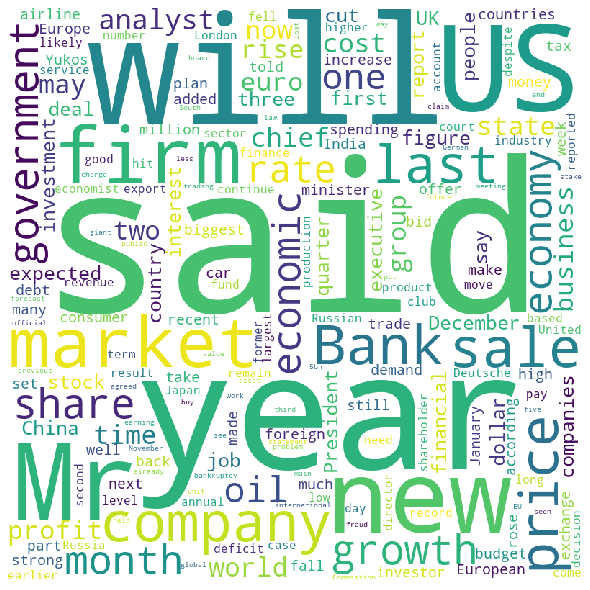

In [7]:
businessList = businessDf['Content'].tolist()
flatList = []
for b in businessList:
    parsed = b.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

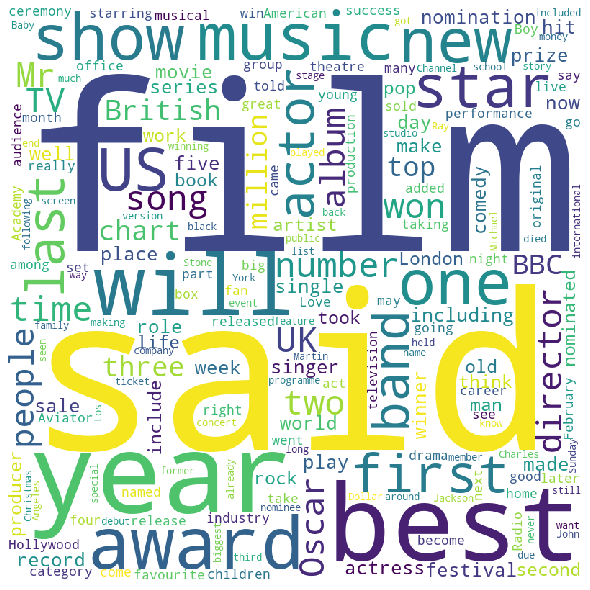

In [8]:
entertainmentList = entertainmentDf['Content'].tolist()
flatList = []
for e in entertainmentList:
    parsed = e.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

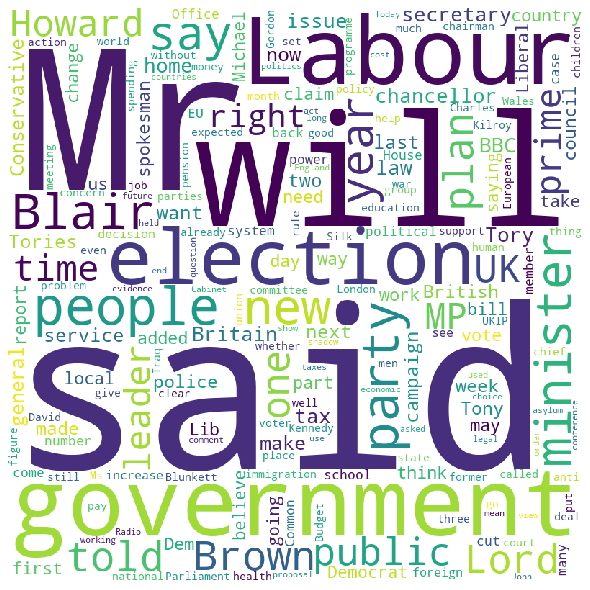

In [9]:
politicsList = politicsDf['Content'].tolist()
flatList = []
for p in politicsList:
    parsed = p.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

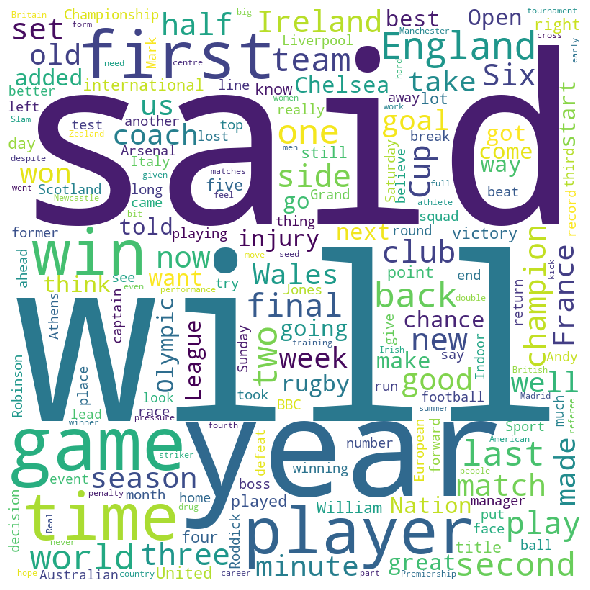

In [10]:
sportList = sportDf['Content'].tolist()
flatList = []
for s in sportList:
    parsed = s.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

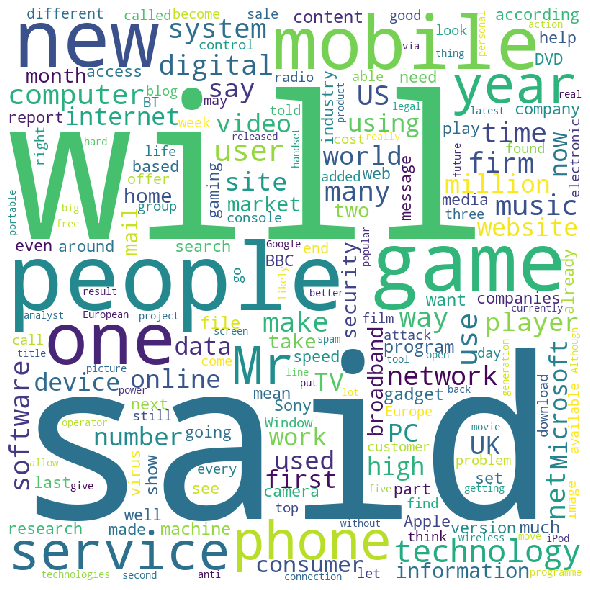

In [11]:
techList = techDf['Content'].tolist()
flatList = []
for t in techList:
    parsed = t.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

<h3>2.Υλοποίηση Κατηγοριοποίησης (Classification- tf-idf)</h3>

In [12]:
content_train, content_test, category_train, category_test = train_test_split(trainDf['Content'], trainDf['Category'], test_size=0.2)

#create numeric categories using the LabelEncoder and fit-transorm pipeline
le = preprocessing.LabelEncoder()
le.fit(category_train)
category_train = le.transform(category_train)
category_test = le.transform(category_test)

In [13]:
vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
contentList = content_train.tolist()
X_train = vectorizer.fit_transform(contentList)
testList = content_test.tolist()
X_test = vectorizer.transform(testList)

Support Vector Machines

In [14]:
classifier = svm.SVC()
classifier.fit(X_train, category_train)

predictions = classifier.predict(X_test)

In [15]:
print(metrics.accuracy_score(category_test, predictions))

0.9775280898876404


In [16]:
# recall
from sklearn.metrics import precision_recall_fscore_support

print(precision_recall_fscore_support(category_test, predictions, average='macro'))
print(precision_recall_fscore_support(category_test, predictions, average='micro'))
print(precision_recall_fscore_support(category_test, predictions, average='weighted'))
print(precision_recall_fscore_support(category_test, predictions, average=None))

print()
#precision
from sklearn.metrics import precision_score
print(precision_score(category_test, predictions, average='macro'))
print(precision_score(category_test, predictions, average='micro'))
print(precision_score(category_test, predictions, average='weighted'))
print(precision_score(category_test, predictions, average=None))

print()
# F-measure (F1-score)
from sklearn.metrics import f1_score
print(f1_score(category_test, predictions, average='macro'))
print(f1_score(category_test, predictions, average='micro'))
print(f1_score(category_test, predictions, average='weighted'))
print(f1_score(category_test, predictions, average=None))

(0.9777040229885058, 0.9773700233002559, 0.977451881447388, None)
(0.9775280898876404, 0.9775280898876404, 0.9775280898876404, None)
(0.977536452279478, 0.9775280898876404, 0.9774413874677929, None)
(array([0.96875   , 1.        , 0.96      , 0.98275862, 0.97701149]), array([0.93939394, 0.98611111, 0.97297297, 1.        , 0.98837209]), array([0.95384615, 0.99300699, 0.96644295, 0.99130435, 0.98265896]), array([ 99,  72,  74, 114,  86]))

0.9777040229885058
0.9775280898876404
0.977536452279478
[0.96875    1.         0.96       0.98275862 0.97701149]

0.977451881447388
0.9775280898876404
0.9774413874677929
[0.95384615 0.99300699 0.96644295 0.99130435 0.98265896]


Random Forests

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, category_train)

predictions = classifier.predict(X_test)

In [19]:
print(metrics.accuracy_score(category_test, predictions))

0.7887640449438202


Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import *
from scipy import *

In [21]:
classifier = GaussianNB()
classifier.fit(X_train.todense(), category_train)
predictions = classifier.predict(X_test.todense())

In [22]:
print(metrics.accuracy_score(category_test, predictions))

0.8853932584269663


K-Nearest Neighbor

In [23]:
from sklearn.metrics.pairwise import euclidean_distances
from collections import Counter
import itertools
# distance between rows of X

def find_category(row,k):
    distances = []
    distances = euclidean_distances(X_train , X_test[row])
    categories = [x for _,x in sorted(zip(distances,category_train))]

    results = categories[:k]
    keys = Counter(results).keys()
    freq = Counter(results).values()
    mostFreq = [x for _,x in sorted(zip(freq,keys))]
    mostFreq = [ele for ele in reversed(mostFreq)] 
    mostFreq = mostFreq[:1]
    return mostFreq


def k_nearest_neighbour(k):
    predictions = []
    for i in range(0,X_test.shape[0]):
        predictions.append(find_category(i,k))
    return predictions


predictions1 = k_nearest_neighbour(1)

In [24]:
predictions = list(itertools.chain(*predictions1))
print(metrics.accuracy_score(category_test, predictions))

0.9370786516853933


<h3> 2.Υλοποίηση Κατηγοριοποίησης (Classification - BoW) </h3>

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
contentList = content_train.tolist()
X_train = vectorizer.fit_transform(contentList)
testList = content_test.tolist()
X_test = vectorizer.transform(testList)

Support Vector Machines

In [26]:
classifier = svm.SVC()
classifier.fit(X_train, category_train)

predictions = classifier.predict(X_test)

In [27]:
print(metrics.accuracy_score(category_test, predictions))

0.9550561797752809


Random Forests

In [28]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, category_train)

predictions = classifier.predict(X_test)

In [29]:
print(metrics.accuracy_score(category_test, predictions))

0.7887640449438202


Naive Bayes

In [30]:
classifier = GaussianNB()
classifier.fit(X_train.todense(), category_train)
predictions = classifier.predict(X_test.todense())

In [31]:
print(metrics.accuracy_score(category_test, predictions))

0.898876404494382


K-Nearest Neighbor

In [32]:
def find_category(row,k):
    distances = []
    distances = euclidean_distances(X_train , X_test[row])
    categories = [x for _,x in sorted(zip(distances,category_train))]

    results = categories[:k]
    keys = Counter(results).keys()
    freq = Counter(results).values()
    mostFreq = [x for _,x in sorted(zip(freq,keys))]
    mostFreq = [ele for ele in reversed(mostFreq)] 
    mostFreq = mostFreq[:1]
    return mostFreq


def k_nearest_neighbour(k):
    predictions = []
    for i in range(0,X_test.shape[0]):
        predictions.append(find_category(i,k))
    return predictions


predictions1 = k_nearest_neighbour(1)

In [33]:
predictions = list(itertools.chain(*predictions1))
print(metrics.accuracy_score(category_test, predictions))

0.8089887640449438


<h3>4. Υλοποίηση Συσταδοποίησης (Clustering)</h3>

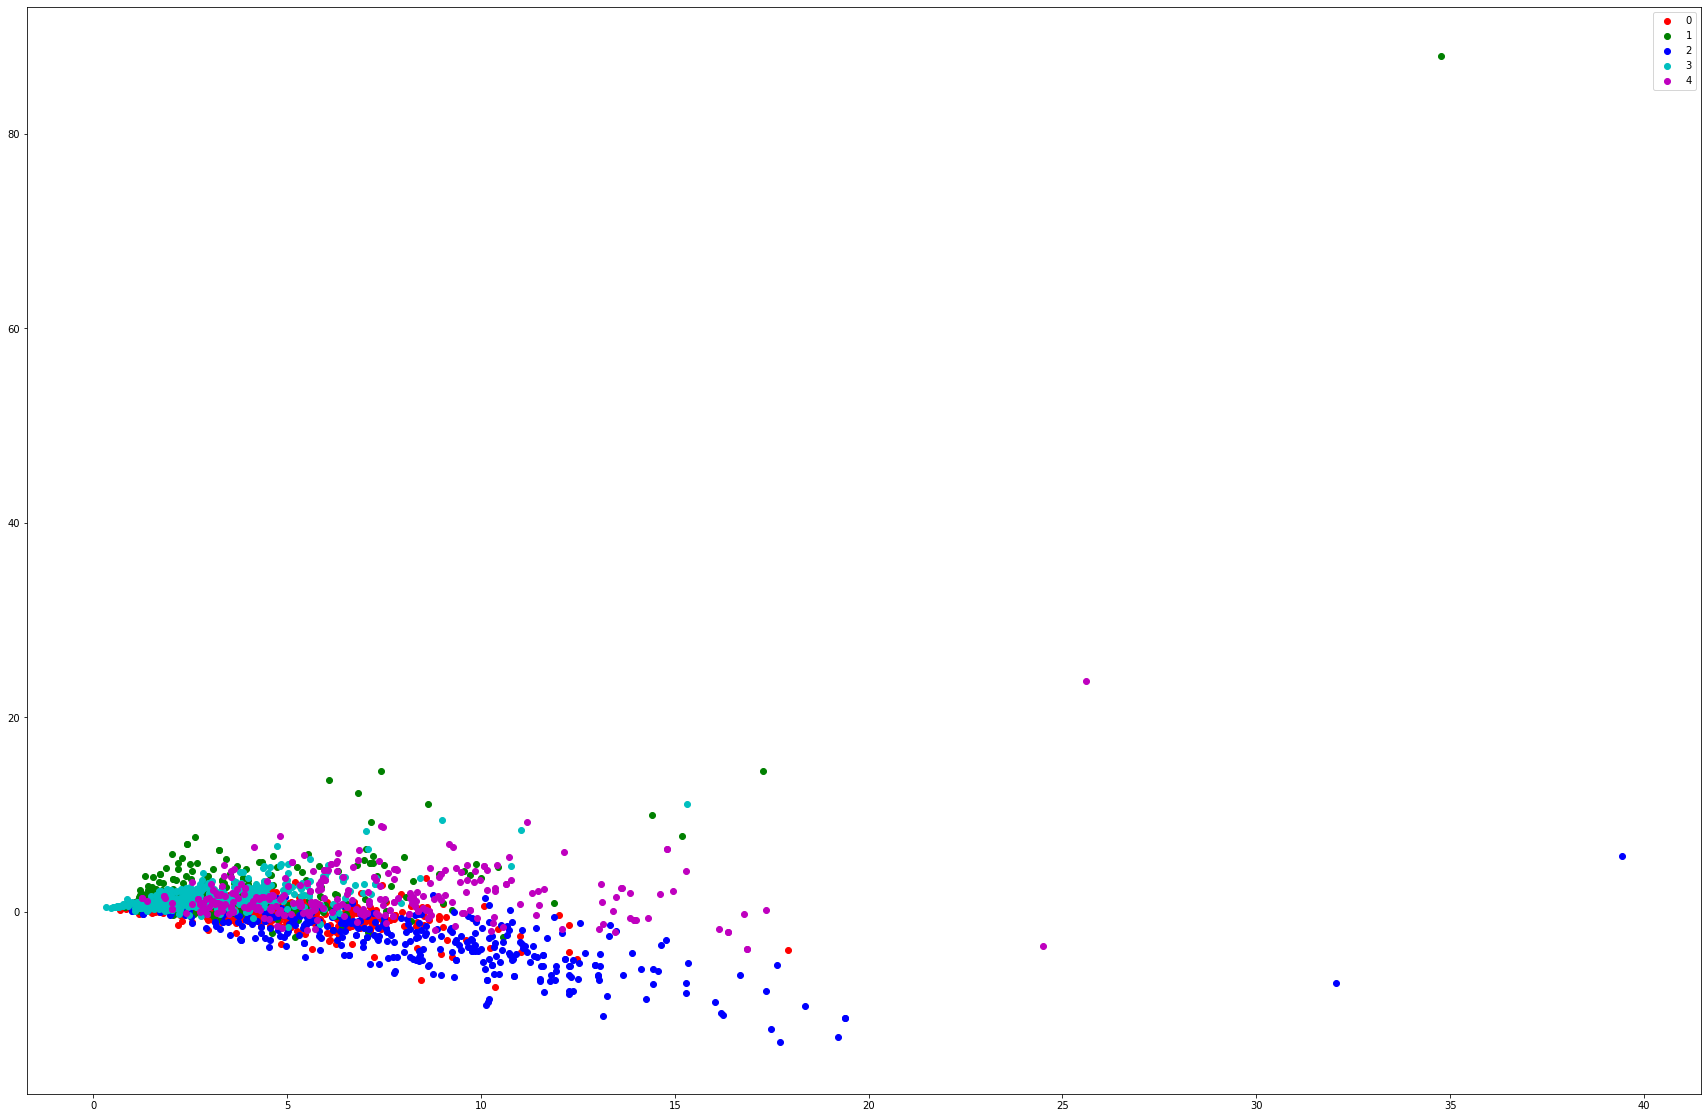

In [68]:

from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp

X = X_train
y = category_train

from sklearn.decomposition import PCA

clf = TruncatedSVD(100)
Xpca = clf.fit_transform(X)


target_ids = range(5)

from matplotlib import pyplot as plt
plt.figure(figsize=(30, 20))
for i, c, label in zip( target_ids , 'rgbcmykw', ['0','1','2','3','4']):
    plt.scatter(Xpca[y == i, 0], Xpca[y == i, 1],
               c=c, label=label)
plt.legend()
plt.show()


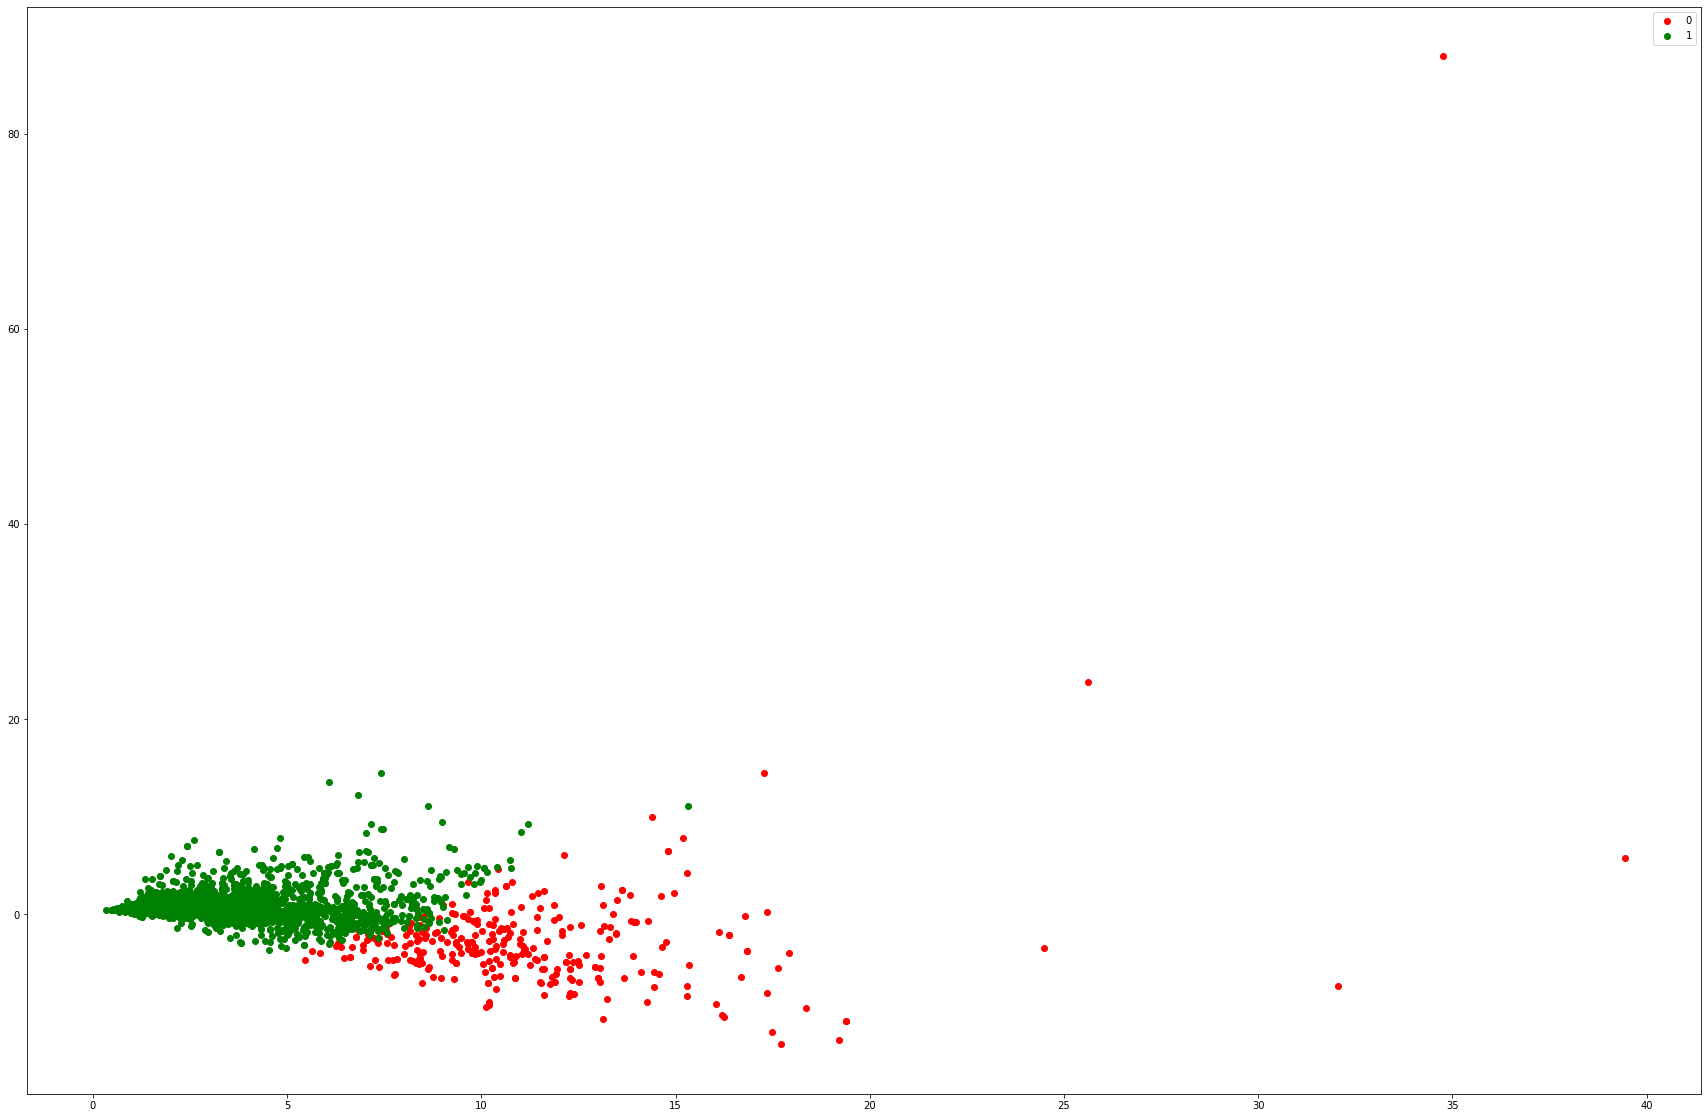

In [70]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
y = kmeans.labels_

target_ids = range(2)

from matplotlib import pyplot as plt
plt.figure(figsize=(30, 20))
for i, c, label in zip( target_ids , 'rgbcmykw', ['0','1']):
    plt.scatter(Xpca[y == i, 0], Xpca[y == i, 1],
               c=c, label=label)
plt.legend()
plt.show()